In [47]:
import numpy as np
import pandas as pd
from numpy import genfromtxt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Dataset 3

In [48]:
data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

cols = ['FT1', 'FT2', 'FT3', 'FT4', 'FT5', 'FT6', 'Charges']
input_cols = ['FT1', 'FT2', 'FT3', 'FT4', 'FT5', 'FT6']

charges_idx = cols.index('Charges')

y_ = data3[:, charges_idx]

data3_copy = np.copy(data3)
data3_copy = np.delete(data3_copy, charges_idx, 1)

X_ = data3_copy

### Visualize the Data

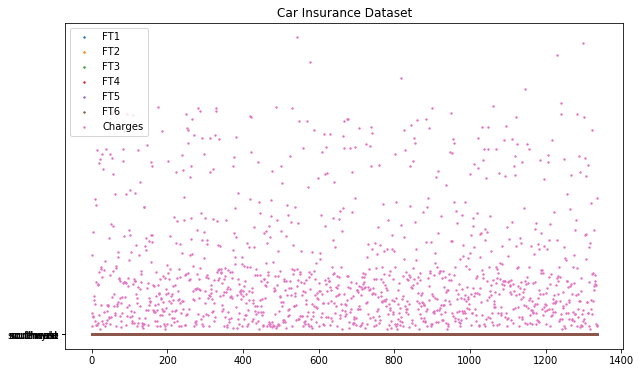

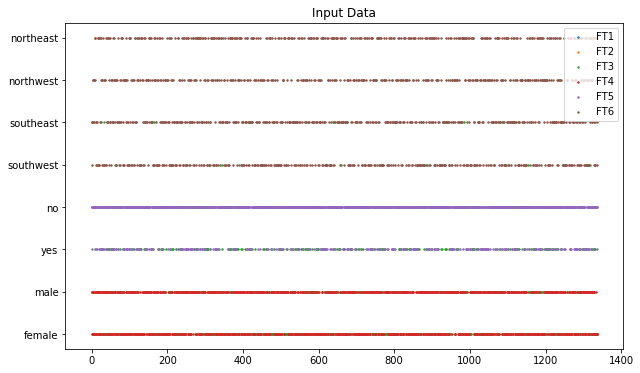

In [49]:
for idx, col in enumerate(cols):
    feature = data3[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col,  s=2)
    
plt.title('Car Insurance Dataset')
plt.legend()
plt.show()

for idx, col in enumerate(input_cols):
    feature = X_[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col,  s=2)
    
plt.title('Input Data')
plt.legend()
plt.show()

## Feature Preprocessing

### One-hot Encoding on Features ft4, ft5, and ft6

In [50]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

onehot_enc = OneHotEncoder()
data3_to_onehot_enc = data3[:, 3:6] # One-hot encode features ft4, ft5,and ft6
data3_onehot_encoded = onehot_enc.fit_transform(data3_to_onehot_enc).toarray()

X_onehot_encoded = np.copy(X_)
# print(X_onehot_encoded[0:5,:])
# print(np.shape(X_onehot_encoded))
X_onehot_encoded = np.delete(X_onehot_encoded, np.s_[3:6], axis=1)
# print(X_onehot_encoded[0:5,:])
# print(np.shape(X_onehot_encoded))

X_onehot_encoded = np.concatenate((X_onehot_encoded, data3_onehot_encoded), axis=1)

# print(X_onehot_encoded[0:5,:])
# print(np.shape(X_onehot_encoded))

### Linear Regression, One-hot Encoding

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y_1, y_2):
    return np.sqrt(mean_squared_error(y_1, y_2))

In [52]:
model = LinearRegression()

X = X_onehot_encoded
y = y_

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 6051.3695241838495
RMSE Testing for fold 0 = 5976.341526998486
RMSE Training for fold 1 = 6025.560377283273
RMSE Testing for fold 1 = 6195.262808822173
RMSE Training for fold 2 = 6038.250869795185
RMSE Testing for fold 2 = 6087.498376385135
RMSE Training for fold 3 = 6019.424200492137
RMSE Testing for fold 3 = 6272.609595187519
RMSE Training for fold 4 = 6026.574940183817
RMSE Testing for fold 4 = 6213.039051800156
RMSE Training for fold 5 = 6134.549933247374
RMSE Testing for fold 5 = 5158.073086898697
RMSE Training for fold 6 = 6095.320776848486
RMSE Testing for fold 6 = 5545.814968532659
RMSE Training for fold 7 = 5932.488996633746
RMSE Testing for fold 7 = 6963.6582296474035
RMSE Training for fold 8 = 6072.260130482568
RMSE Testing for fold 8 = 5772.909049941434
RMSE Training for fold 9 = 5997.623956668823
RMSE Testing for fold 9 = 6451.232130571959
--
RMSE Training average = 6039.342370581926
RMSE Testing average  = 6063.643882478562
RMSE overall = 6041.6

### Plot fitted values

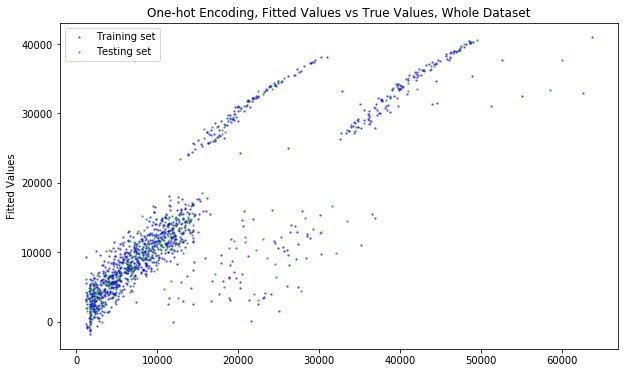

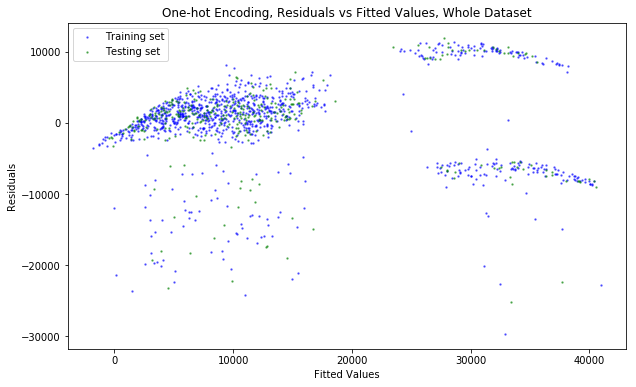

In [53]:
X = X_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

### Standardization on numerical features (ft 1, ft2, ft3)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data3_to_scale = data3[:, 0:3] # Standardize features ft1, ft2,and ft3
data3_standardized = scaler.fit_transform(data3_to_scale)

# print(data3_standardized)

X_scaled_onehot_encoded = np.copy(X_onehot_encoded)
# print(X_scaled_onehot_encoded[0:5,:])
# print(np.shape(X_scaled_onehot_encoded))
X_scaled_onehot_encoded = np.delete(X_scaled_onehot_encoded, np.s_[0:3], axis=1)
# print(X_scaled_onehot_encoded[0:5,:])
# print(np.shape(X_scaled_onehot_encoded))
X_scaled_onehot_encoded = np.concatenate((data3_standardized, X_scaled_onehot_encoded), axis=1)

# print(X_scaled_onehot_encoded[0:5,:])
# print(np.shape(X_scaled_onehot_encoded))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Linear Regression, Standardization

In [55]:
model = LinearRegression()

X = X_scaled_onehot_encoded
y = y_

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 6051.36952418385
RMSE Testing for fold 0 = 5976.341526998486
RMSE Training for fold 1 = 6025.560377283273
RMSE Testing for fold 1 = 6195.262808822173
RMSE Training for fold 2 = 6038.250869795185
RMSE Testing for fold 2 = 6087.498376385133
RMSE Training for fold 3 = 6051.794112449065
RMSE Testing for fold 3 = 6266.083422175964
RMSE Training for fold 4 = 6026.574940183816
RMSE Testing for fold 4 = 6213.039051800158
RMSE Training for fold 5 = 6134.549933247374
RMSE Testing for fold 5 = 5158.0730868987
RMSE Training for fold 6 = 6099.276377745872
RMSE Testing for fold 6 = 5557.162650232983
RMSE Training for fold 7 = 5932.488996633746
RMSE Testing for fold 7 = 6963.658229647403
RMSE Training for fold 8 = 6072.260130482568
RMSE Testing for fold 8 = 5772.909049941434
RMSE Training for fold 9 = 5997.778981363553
RMSE Testing for fold 9 = 6445.253518962835
--
RMSE Training average = 6042.99042433683
RMSE Testing average  = 6063.528172186527
RMSE overall = 6041.6796511

### Plot fitted values


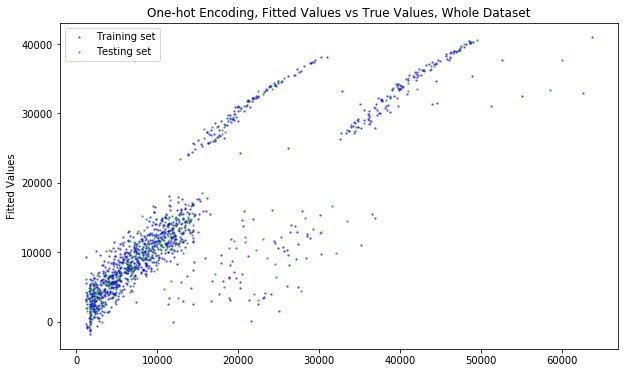

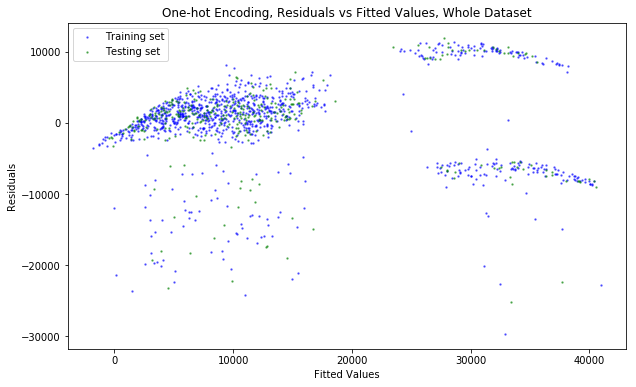

In [56]:
X = X_scaled_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

### Feature Division

In [57]:
data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

data3_division = data3[:,0]

for i in range(len(data3_division)):
    if data3[i,0] < 30:
        data3_division[i] = 1
    elif data3[i,0] > 50:
        data3_division[i] = 3
    else:
        data3_division[i] = 2

data3_division = data3_division[:, np.newaxis]        
# print(data3_division[1:10, 0])
# print(np.shape(data3_division))

X_division_scaled_onehot_encoded = np.copy(X_scaled_onehot_encoded)
# print(X_division_scaled_onehot_encoded[0:5,:])
# print(np.shape(X_division_scaled_onehot_encoded))
X_division_scaled_onehot_encoded = np.delete(X_division_scaled_onehot_encoded, 0, axis=1)
# print(X_division_scaled_onehot_encoded[0:5,:])
# print(np.shape(X_division_scaled_onehot_encoded))
X_division_scaled_onehot_encoded = np.concatenate((data3_division, X_division_scaled_onehot_encoded), axis=1)

# print(X_division_scaled_onehot_encoded[0:5,:])
# print(np.shape(X_division_scaled_onehot_encoded))

### Linear Regression, Feature Division

In [58]:
model = LinearRegression()

X = X_division_scaled_onehot_encoded
y = y_

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 6218.897752834433
RMSE Testing for fold 0 = 6051.384757511032
RMSE Training for fold 1 = 6184.2752726955205
RMSE Testing for fold 1 = 6352.292413446175
RMSE Training for fold 2 = 6178.424790778173
RMSE Testing for fold 2 = 6409.456928102866
RMSE Training for fold 3 = 6168.407749925251
RMSE Testing for fold 3 = 6516.669821436165
RMSE Training for fold 4 = 6202.875056032284
RMSE Testing for fold 4 = 6213.293324441349
RMSE Training for fold 5 = 6285.988775762968
RMSE Testing for fold 5 = 5390.965302787946
RMSE Training for fold 6 = 6250.3377392278035
RMSE Testing for fold 6 = 5739.512716296268
RMSE Training for fold 7 = 6085.838920948148
RMSE Testing for fold 7 = 7164.010402838774
RMSE Training for fold 8 = 6242.548668025446
RMSE Testing for fold 8 = 5815.526771378082
RMSE Training for fold 9 = 6161.972899673732
RMSE Testing for fold 9 = 6559.833191912015
--
RMSE Training average = 6197.956762590376
RMSE Testing average  = 6221.294563015067
RMSE overall = 6202.2

### Plot fitted values

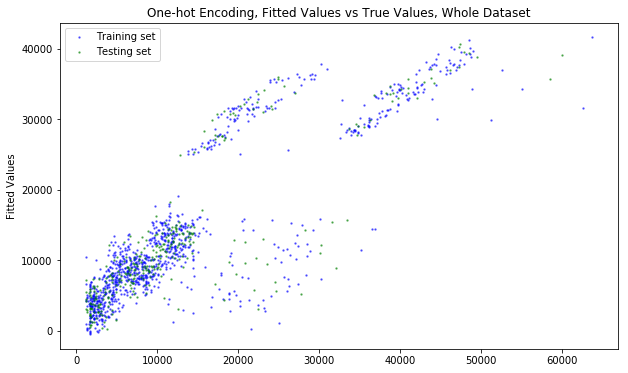

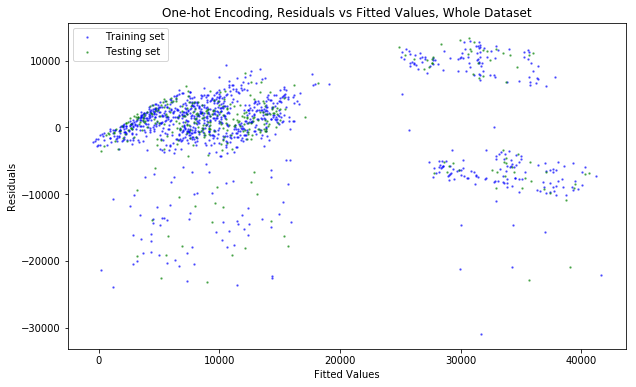

In [59]:
X = X_division_scaled_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

### Question 2: Correlation Exploration

In [61]:
# TODO

### Question 3: Modify the Target Variable

In [62]:
# TODO

In [60]:
import os
os.system("say 'I am done with this program. Let's go team!") 

0